In [1]:
import numpy as np
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt

In [2]:
# 均方误差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7  # 防止负无穷的产生
    return -np.sum(t * np.log(y + delta))

In [5]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

## Mini-batch

In [6]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [7]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [8]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [10]:
np.random.choice(60000, 10)

array([17027,  5824, 55661, 37204, 23942,  8754,    45,  9699, 48731,
       57891])

In [11]:
# Update error
# for one-hot encoding
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
np.array(t).ndim

1

In [13]:
# For classification label
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 数值微分

In [14]:
np.float32(1e-50)

0.0

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

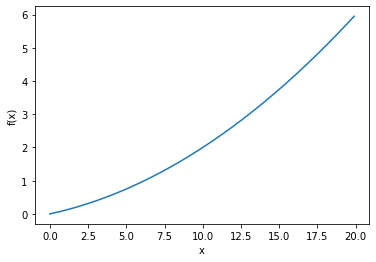

In [16]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [17]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2*h)

In [18]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [19]:
# 偏导数
def function_2(x):
    return x[0]**2 + x[1]**2

In [20]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [21]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [22]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [23]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [24]:
# 梯度
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad



In [25]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

## 梯度下降法

In [26]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [27]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [28]:
print(init_x) # 这个在函数内部被更新了！

[-6.11110793e-10  8.14814391e-10]


In [29]:
# 真实的结果就是 [0, 0]

# 学习率过大
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

# 学习率过小
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


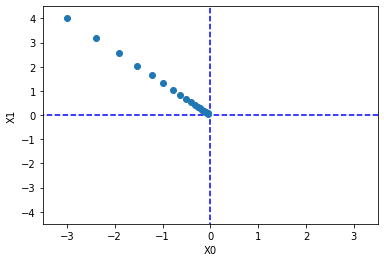

In [30]:
%run gradient_method.py

In [31]:
# 简单的神经网络实例
%run gradient_simplenet.py

[[ 0.22889603  0.29767115 -0.52656718]
 [ 0.34334405  0.44650673 -0.78985077]]


In [32]:
net = simpleNet()
print(net.W)

[[ 0.65337431 -1.39241009 -1.19137684]
 [ 0.80420938 -0.52423033 -0.79927116]]


In [33]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.11581302 -1.30725336 -1.43417015]


In [34]:
np.argmax(p)  # 最大值索引

0

In [35]:
t = np.array([0, 0, 1]) # 正确标签
net.loss(x, t)

2.7041886526853034

In [36]:
# 求梯度
# f = lambda w: net.loss(x, t)
def f(W):  # 这里 W 是一个伪参数
    return net.loss(x, t)

# def function_2(x):
#     return x[0]**2 + x[1]**2

from common.gradient import numerical_gradient
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.51425599  0.04558847 -0.55984446]
 [ 0.77138399  0.0683827  -0.83976669]]


## 学习算法的实现

4 个步骤：

1. mini-batch：从训练数据中随机选出一部分数据，称为 mini-batch，我们的目标是减少其损失函数的值。
2. 计算梯度
3. 更新参数：将权重参数沿梯度方向进行微小更新。
4. 重复以上 3 个步骤

In [37]:
%run two_layer_net.py

In [38]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [39]:
x = np.random.rand(100, 784) 
y = net.predict(x)

In [40]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)
print(grads)

{'W1': array([[ 1.57233830e-04, -3.27204464e-05,  7.09272041e-05, ...,
         3.82704157e-05,  1.31438858e-04, -6.86424761e-05],
       [ 8.82482887e-05, -2.33764341e-05,  1.58085238e-04, ...,
        -5.91566818e-05,  2.27815959e-04, -1.51073112e-04],
       [ 5.86925730e-05, -2.95023161e-05,  1.58967801e-04, ...,
         3.51605789e-05,  1.35673044e-04, -7.27458649e-05],
       ...,
       [ 1.34963050e-04, -2.50532217e-05,  1.35560787e-04, ...,
        -1.33984845e-05,  2.28285124e-04, -2.33018531e-04],
       [ 1.55446758e-04,  3.07380899e-05,  1.80522042e-05, ...,
        -2.50350229e-05,  3.36844315e-04, -3.96073341e-04],
       [ 1.19790349e-04, -4.56035365e-05,  3.01791281e-05, ...,
        -4.53776750e-05,  2.99933756e-04, -3.21361555e-04]]), 'b1': array([ 1.43882743e-04,  8.92902197e-06,  9.02949959e-05, -7.26291294e-05,
       -6.25127727e-05, -2.40240527e-04,  1.65032883e-04,  1.60650826e-05,
        9.15513554e-05,  1.26032917e-05,  1.64080045e-04, -8.51107540e-05,
    

这个梯度的计算是很慢的。

train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.786, 0.7887
train acc, test acc | 0.87535, 0.8777
train acc, test acc | 0.8969, 0.9007
train acc, test acc | 0.9074, 0.9106
train acc, test acc | 0.9134666666666666, 0.9161
train acc, test acc | 0.9194833333333333, 0.9201
train acc, test acc | 0.9237666666666666, 0.9256
train acc, test acc | 0.9273833333333333, 0.928
train acc, test acc | 0.93155, 0.9308
train acc, test acc | 0.9340666666666667, 0.933
train acc, test acc | 0.9366, 0.9361
train acc, test acc | 0.9387666666666666, 0.9362
train acc, test acc | 0.94185, 0.94
train acc, test acc | 0.94365, 0.9429
train acc, test acc | 0.9457166666666666, 0.9438
train acc, test acc | 0.9473166666666667, 0.945


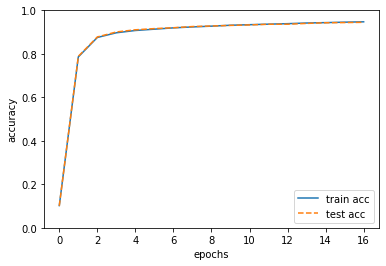

In [42]:
# 一个实际的神经网络训练
%run train_neuralnet.py